In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [236]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [237]:
df = df.drop("Gender", axis = 1)
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [238]:
df["Weight"] = df["Weight"] / 2.20462
df["Height"] = df["Height"] * 2.54

Text(0.5, 0, 'Weight')

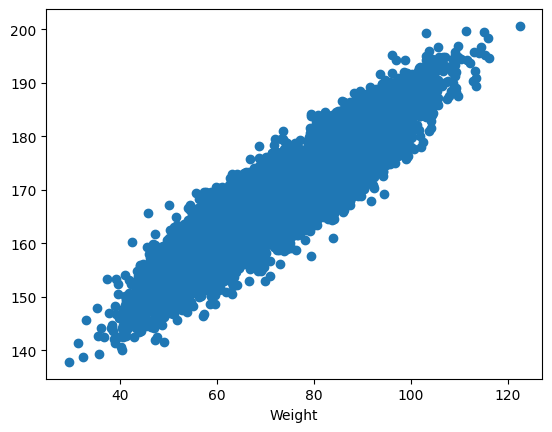

In [239]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
#plt.ylabel("Height")

## steps

1. dataset
    1. divide the dature based on independent and dependent feature
2. train test split of dataset
3. standardize the dataset
4. Train the model using Linear Regression

#### devide the dataset into dependent and dependent feature

In [240]:
X = df[['Weight']]
y = df['Height']

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [243]:
X.shape, y.shape

((10000, 1), (10000,))

In [244]:
X_train.shape,X_test.shape

((8000, 1), (2000, 1))

In [245]:
## standardizaion

from sklearn.preprocessing import StandardScaler

In [246]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_sc,X_test_sc

(array([[-1.26850469],
        [ 1.49950187],
        [ 1.23435095],
        ...,
        [-0.14126217],
        [ 0.56364485],
        [-0.34162408]], shape=(8000, 1)),
 array([[ 0.36793009],
        [ 1.05598138],
        [ 0.27747375],
        ...,
        [-1.1281409 ],
        [ 0.81914676],
        [-1.83691726]], shape=(2000, 1)))

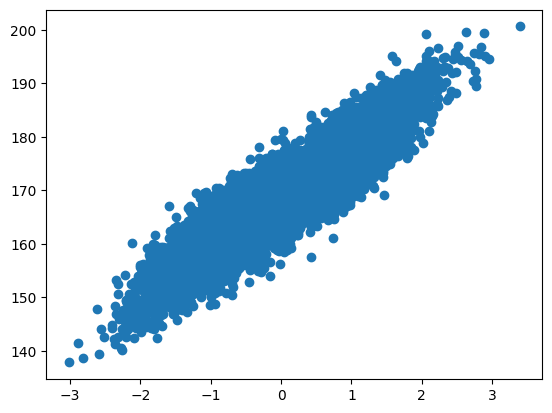

In [247]:
plt.scatter(X_train_sc,Y_train)

In [248]:
## train out model Using SLR model

from sklearn import linear_model

In [249]:
model = linear_model.LinearRegression()
model.fit(X_train_sc,Y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [250]:
model.coef_, model.intercept_

(array([9.02917391]), np.float64(168.55359077502231))

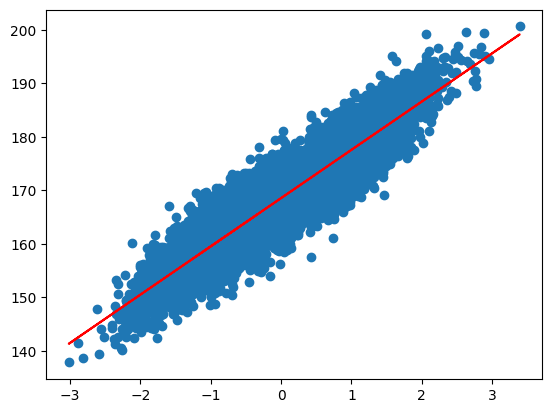

In [251]:
plt.scatter(X_train_sc,Y_train)
plt.plot(X_train_sc,model.predict(X_train_sc),'r')

### Prediction of train data
1. prediction hight output = intercept + coed_(weight)
2. y_pred_train = 66.3596 +3.5547(X_train_sc)


### Prediction of tet data
1. predicted heigt output = intercept+coef_(weight)
2. y_pred_test = 66.3596 + 3.5547(X_test)

In [252]:
y_pred_test = model.predict(X_test_sc)

In [253]:
y_pred_test, Y_test

(array([171.87569557, 178.08823033, 171.0589495 , ..., 158.36741035,
        175.94980932, 151.96774533], shape=(2000,)),
 6252    174.465570
 4684    174.826508
 1731    168.651246
 4742    182.700524
 4521    170.288974
            ...    
 6412    167.001447
 8285    154.258916
 7853    157.959889
 1095    170.353492
 6929    148.927110
 Name: Height, Length: 2000, dtype: float64)

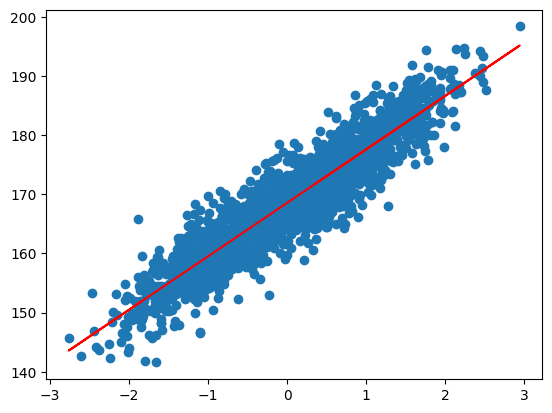

In [254]:
plt.scatter(X_test_sc,Y_test)
plt.plot(X_test_sc,model.predict(X_test_sc),'r')

In [255]:
## performance metric 
# mse, mae, rmse, r2,adjr2

In [256]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error,r2_score

In [257]:
mse = mean_squared_error(Y_test,y_pred_test)
mae = mean_absolute_error(Y_test,y_pred_test)
r2 = r2_score(Y_test,y_pred_test)
rmse= np.sqrt(mse)

print(f"mean sq err {mse}")
print(f"mean abs err {mae}")
print(f"root mean sq err {rmse}")
print(f"r2 score {r2}")


mean sq err 13.6281143467758
mean abs err 2.9435187080719927
root mean sq err 3.6916276013129763
r2 score 0.8578120230894555


# adjusted r2 
adj_r2 = 1 - [(1-r2)*(n-1)/(n-k-1)]**

where:
r2 : te r2 modeln = no of observations
k: the number of predictor variable

In [258]:
adj_r2 = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test_sc.shape[1]-1)

In [259]:
adj_r2

0.8577408579358465

In [260]:
model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [261]:
## new data point weight is 80
scaled_weight = sc.transform([[70]])
scaled_weight

c:\Users\PC\Desktop\Prime\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.21857127]])

In [262]:
model.predict([scaled_weight[0]])

array([166.58007273])

In [263]:
new_weight = np.array([[80.3]])
new_weight_sc = sc.transform(new_weight)
predicted_height = model.predict(new_weight_sc)
predicted_height


c:\Users\PC\Desktop\Prime\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([172.97897497])

Text(0, 0.5, 'y_pred')

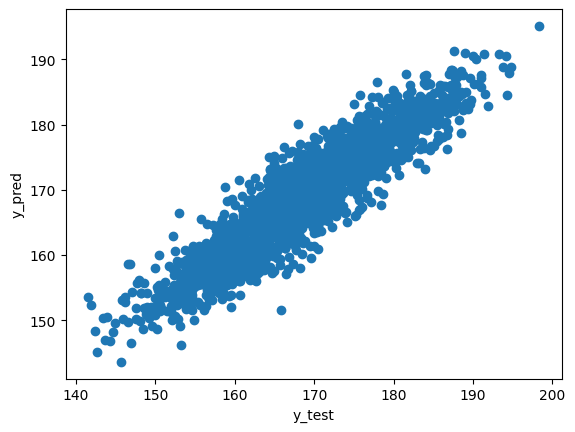

In [267]:
# assumption 
# plot the data points as scatter plot

plt.scatter(Y_test,y_pred_test)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [268]:
residuals = Y_test - y_pred_test
residuals

6252    2.589874
4684   -3.261723
1731   -2.407703
4742   -0.991954
4521   -4.293551
          ...   
6412    3.875053
8285   -2.639916
7853   -0.407521
1095   -5.596317
6929   -3.040635
Name: Height, Length: 2000, dtype: float64

In [269]:
import seaborn as sns


C:\Users\PC\AppData\Local\Temp\ipykernel_18304\3762910054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

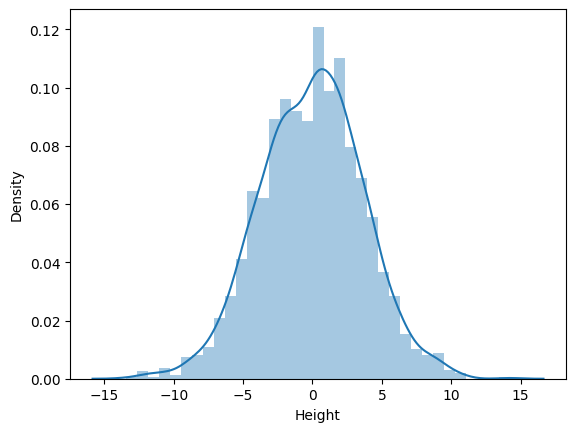

In [271]:
sns.distplot(residuals,kde=True)

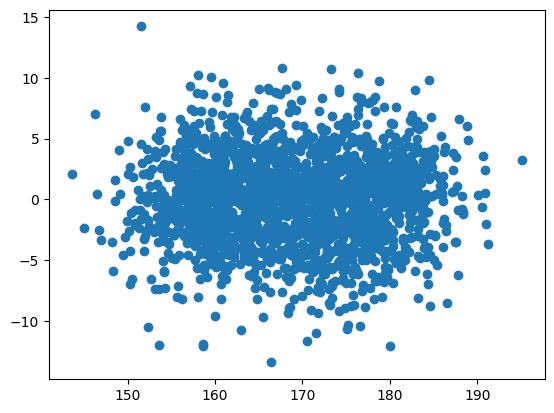

In [272]:
plt.scatter(y_pred_test,residuals)

In [ ]:
# pickling the model